# Implementing Linear Regression From Scratch

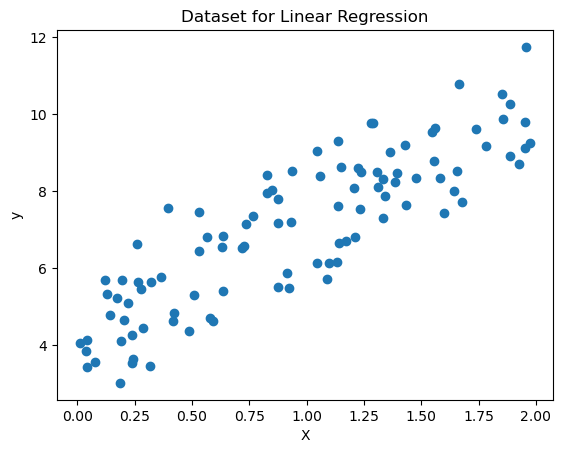

Intercept and slope:
[[4.22215104]
 [2.96846754]]

Predictions for new data points:
[[ 4.22215104]
 [10.15908613]]


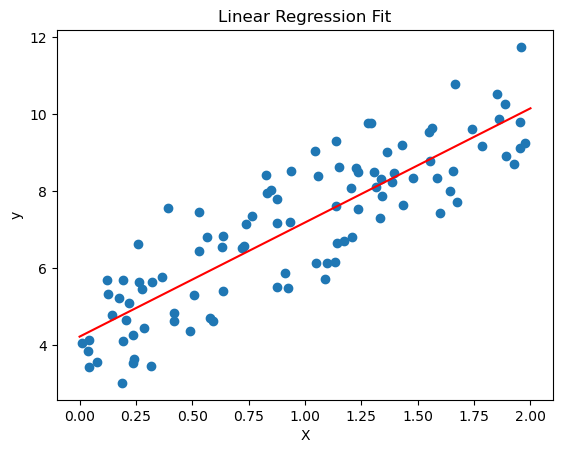

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple dataset
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot the dataset
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dataset for Linear Regression')
plt.show()

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Implementing Linear Regression using Gradient Descent
eta = 0.1  # Learning rate
n_iterations = 1000
m = 100  # Number of instances

# Random initialization of theta
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 1/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

# Print the intercept and slope (theta)
print("Intercept and slope:")
print(theta)

# Predicting with the trained model
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)
print("\nPredictions for new data points:")
print(y_predict)

# Plotting the fitted line
plt.plot(X_new, y_predict, "r-")
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.show()


# Implementing logistic regression from scratch

Iteration 0, Loss: 0.6931
Iteration 100, Loss: 0.2666
Iteration 200, Loss: 0.2247
Iteration 300, Loss: 0.2071
Iteration 400, Loss: 0.1974
Iteration 500, Loss: 0.1913
Iteration 600, Loss: 0.1871
Iteration 700, Loss: 0.1842
Iteration 800, Loss: 0.1820
Iteration 900, Loss: 0.1803

Training Accuracy: 96.00%


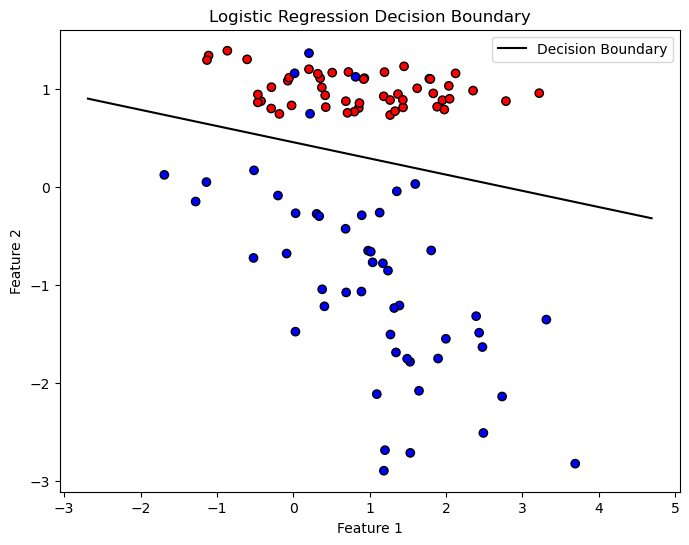

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Step 1: Generate a binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=0)

# Add bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]
y = y.reshape(-1, 1)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function (Binary Cross-Entropy)
def compute_loss(y_true, y_pred):
    epsilon = 1e-15  # to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient descent
def train(X, y, lr=0.1, n_iter=1000):
    theta = np.zeros((X.shape[1], 1))
    for i in range(n_iter):
        z = X.dot(theta)
        h = sigmoid(z)
        gradient = X.T.dot(h - y) / y.size
        theta -= lr * gradient
        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {compute_loss(y, h):.4f}")
    return theta

# Train the model
theta = train(X_b, y)

# Prediction function
def predict(X, theta):
    return sigmoid(X.dot(theta)) >= 0.5

# Accuracy
y_pred = predict(X_b, theta)
accuracy = np.mean(y_pred == y)
print(f"\nTraining Accuracy: {accuracy * 100:.2f}%")

# Plotting decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.bwr, edgecolors='k')

# Compute decision boundary
x_values = np.array([np.min(X[:, 0] - 1), np.max(X[:, 0] + 1)])
y_values = -(theta[0] + theta[1] * x_values) / theta[2]
plt.plot(x_values, y_values, label='Decision Boundary', color='black')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Logistic Regression Decision Boundary")
plt.show()


# Implementing KNN from scratch

Test Accuracy: 100.00%


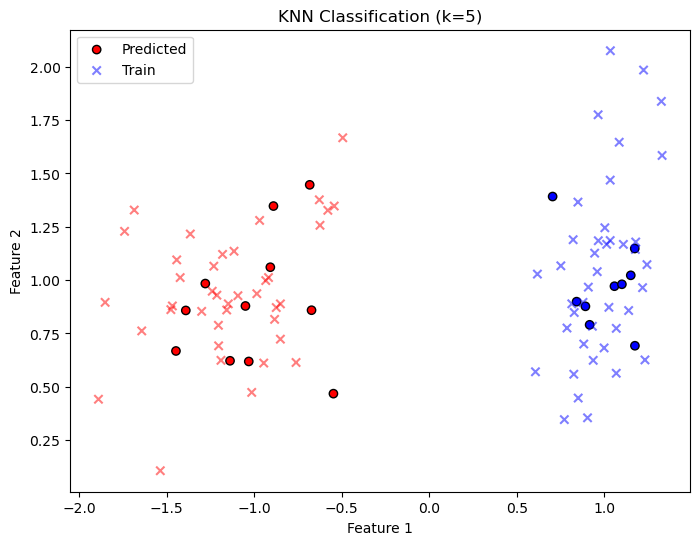

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Step 1: Generate a binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=1)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Implementing KNN from scratch
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def knn_predict(X_train, y_train, x_test, k=3):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]

# Step 3: Predict on test set
predictions = [knn_predict(X_train, y_train, x_test, k=5) for x_test in X_test]

# Step 4: Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 5: Visualize predictions
plt.figure(figsize=(8,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap=plt.cm.bwr, edgecolors='k', label='Predicted')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.bwr, marker='x', alpha=0.5, label='Train')
plt.title('KNN Classification (k=5)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# Implementing SVM from Scratch

Training Accuracy: 100.00%


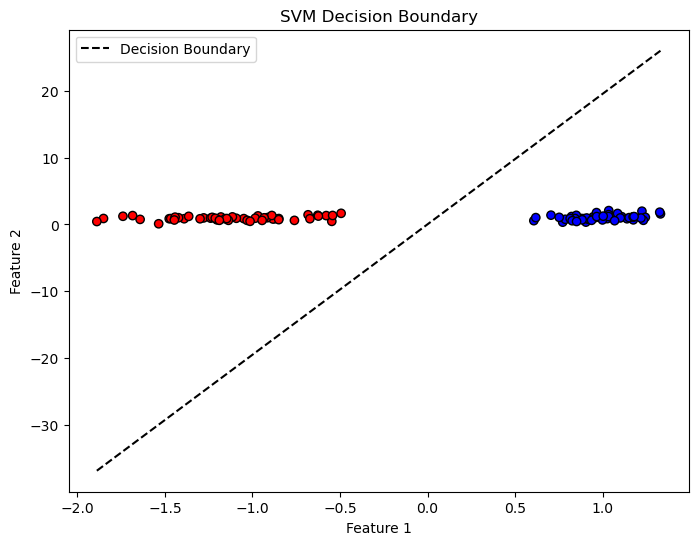

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Step 1: Generate dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=1)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1

# Add bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Step 2: SVM training function
def svm_train(X, y, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
    weights = np.zeros(X.shape[1])

    for _ in range(n_iters):
        for idx, x_i in enumerate(X):
            condition = y[idx] * np.dot(x_i, weights)
            if condition >= 1:
                grad = lambda_param * weights
            else:
                grad = lambda_param * weights - y[idx] * x_i
            weights -= learning_rate * grad
    return weights

# Train the model
weights = svm_train(X_b, y)

# Step 3: Prediction
def predict(X, weights):
    X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
    return np.sign(X.dot(weights))

# Accuracy
y_pred = predict(X, weights)
accuracy = np.mean(y_pred == y)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

# Step 4: Plot decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')

# Decision boundary: w0 + w1*x1 + w2*x2 = 0 => x2 = -(w0 + w1*x1)/w2
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(weights[0] + weights[1] * x_vals) / weights[2]
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')

plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


# Implementing Naive Bayes from Scratch

Test Accuracy: 90.00%


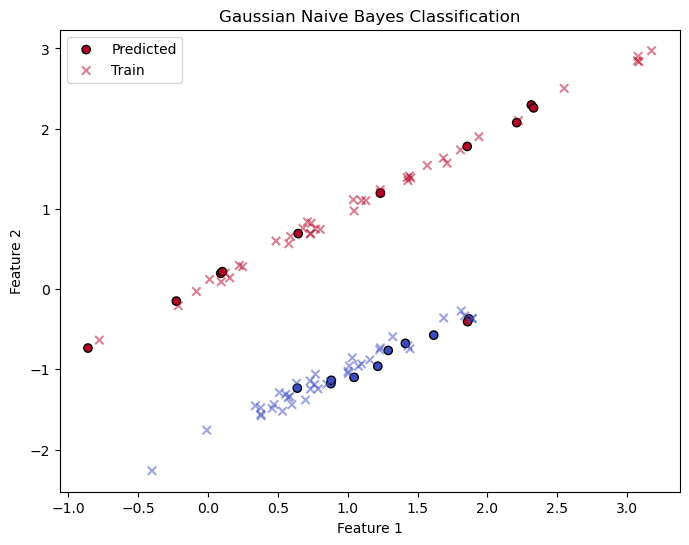

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Step 1: Generate binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 2: Gaussian Naive Bayes implementation
class GaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.vars = {}
        self.priors = {}

        for cls in self.classes:
            X_c = X[y == cls]
            self.means[cls] = X_c.mean(axis=0)
            self.vars[cls] = X_c.var(axis=0)
            self.priors[cls] = X_c.shape[0] / X.shape[0]

    def gaussian_density(self, class_idx, x):
        mean = self.means[class_idx]
        var = self.vars[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var + 1e-9))
        denominator = np.sqrt(2 * np.pi * var + 1e-9)
        return numerator / denominator

    def predict(self, X):
        y_pred = []
        for x in X:
            posteriors = []
            for cls in self.classes:
                prior = np.log(self.priors[cls])
                likelihood = np.sum(np.log(self.gaussian_density(cls, x)))
                posterior = prior + likelihood
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return np.array(y_pred)

# Step 3: Train and predict
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 4: Accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 5: Plot decision boundary (optional visual)
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.coolwarm, edgecolors='k', label="Predicted")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, alpha=0.5, marker='x', label="Train")
plt.title('Gaussian Naive Bayes Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
